In [1]:
#TODO : REFACTOR
import numpy as np
np.random.seed(42)
import sklearn
import os
from imp import reload
#import helper
import keras
import pickle
import math
import collections
from sklearn.metrics import confusion_matrix
from keras import backend as K

from keras.callbacks import CSVLogger, LearningRateScheduler,Callback,ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau



from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd

from tqdm import tqdm

from keras.regularizers import l2

import random
import csv
from tensorflow.contrib.layers import flatten
from skimage import transform as transf

import loader
import preprocess
import plotter
import Models

#from prettytable import PrettyTable
%matplotlib inline

SEED = 22

Using TensorFlow backend.


In [12]:
X_train_orig, y_train_orig, X_test_orig, y_test_orig,X_val_orig,y_val_orig = loader.load_split_input_data()

#Models.print_model_architectures()


Shapes:
X_train: (34799, 32, 32, 3)
X_test: (12630, 32, 32, 3)
X_valid: (4410, 32, 32, 3)


In [13]:
X_train,y_train,X_test,y_test,X_val,y_val= preprocess.preprocess_aug_combine_save(X_train_orig,y_train_orig,X_test_orig,y_test_orig,X_val_orig,y_val_orig)

#clear unused variables
del X_train_orig
del y_train_orig
del X_test_orig
del y_test_orig
del X_val_orig
del y_val_orig

X_train RGB shape: (34799, 32, 32, 3)
X_train Grayscale shape: (34799, 32, 32, 1)
Transformation : Histogram Equalization


/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
  0%|          | 0/34799 [00:00<?, ?it/s]/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
  0%|          | 6/34799 [00:00<10:47, 53.71it/s]

Transformation : Adaptive Equalization


  2%|▏         | 559/34799 [00:00<00:06, 5585.41it/s]

Transformation : Contrast-Stretching


100%|██████████| 4410/4410 [00:00<00:00, 5594.00it/s]


combining dataset 0 of type <class 'numpy.ndarray'> and length 34799
combining dataset 1 of type <class 'numpy.ndarray'> and length 34799
combining dataset 2 of type <class 'numpy.ndarray'> and length 34799


  0%|          | 0/43 [00:00<?, ?it/s]

length of combined set : 104397
Generating 1000 number of images per class, selecting 200 number of images per class for  augmentation
Augmenting  Data...


100%|██████████| 43/43 [00:27<00:00,  2.21it/s]
0it [00:00, ?it/s]

shufle
X_augmented shape: (8600, 32, 32, 1)
y_augmented shape: (8600,)
Generating 5000 number of images per class, selecting 400 number of images per class for  augmentation
No of classes:8
classes:[7, 11, 15, 18, 22, 30, 35, 42]
Augmenting  Data...


8it [00:12,  1.45s/it]


shufle
X_augmented shape: (3200, 32, 32, 1)
y_augmented shape: (3200,)
preprocessed/preprocessed_gray_gray.p
Saving data to preprocessed/preprocessed_gray_gray.p file...
Data cached in preprocessed/preprocessed_gray_gray.p
[41 41 41 ..., 25 25 25]
preprocessed/preprocessed_hist_gray.p
Saving data to preprocessed/preprocessed_hist_gray.p file...
Data cached in preprocessed/preprocessed_hist_gray.p
[41 41 41 ..., 25 25 25]
preprocessed/preprocessed_hae_gray.p
Saving data to preprocessed/preprocessed_hae_gray.p file...
Data cached in preprocessed/preprocessed_hae_gray.p
preprocessed/preprocessed_hcs_gray.p
Saving data to preprocessed/preprocessed_hcs_gray.p file...
Data cached in preprocessed/preprocessed_hcs_gray.p
preprocessed_hset_aug_gray.p
Saving data topreprocessed_hset_aug_gray.p file...
Data cached in pickle file.
combining dataset 0 of type <class 'numpy.ndarray'> and length 8600
combining dataset 1 of type <class 'numpy.ndarray'> and length 104397
combining dataset 2 of type <cl

In [2]:
#loader = reload(loader)
#preprocess = reload(preprocess)
X_train,y_train,X_test,y_test,X_val,y_val=loader.load_combine_preprocessed("hae")




./preprocessed/preprocessed_hset_aug_gray.p
X_aug_all:  8600
y_aug_all:  8600
Data and modules loaded.
./preprocessed/preprocessed_hist_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
./preprocessed/preprocessed_hae_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
./preprocessed/preprocessed_hcs_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
combining dataset 0 of type <class 'numpy.ndarray'> and length 8600
combining dataset 1 of type <class 'numpy.ndarray'> and length 34799
combining dataset 2 of type <class 'numpy.ndarray'> and length 34799
combining dataset 3 of type <class 'numpy.ndarray'> and length 34799
length of combined set : 112997


In [ ]:
#X_aug_classes, y_aug_classes = preprocess.data_augment_classes(y_hset,[7,11,15,18,22,30,35,42],n_gen_per_class=5000,n_aug_per_class=400)

#X_train,y_train=preprocess.combine_datasets([(X_train,y_train),(X_aug_classes,y_aug_classes)])



when using the categorical_crossentropy loss, the targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros expect for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, we can use the Keras utility to_categorical

In [3]:
#one hot  encoding of y series
import params
params = reload(params)
y_train_e= np_utils.to_categorical(y_train,num_classes=params.n_classes)
y_val_e = np_utils.to_categorical(y_val,num_classes=params.n_classes)
y_test_e = np_utils.to_categorical(y_test,num_classes=params.n_classes)

# Training

In [27]:
def save_model_history(label,history) :
    suffix='.log'
    
    filename = os.path.join(params.model_dir,'history_'+label+suffix)
    
    with open(filename, 'wb') as f:
        pickle.dump(history, f)
    print("History saved in file "+filename)
    

import tensorflow as tf
class LearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs={}):
            
        # _lr = K.get_value(tf.to_float(model.optimizer.lr, name='ToFloat'))
        # _decay = tf.to_float(model.optimizer.decay, name='ToFloat')
        #_iter = tf.to_float(model.optimizer.iterations, name='ToFloat')
        
        lr = K.get_value(model.optimizer.lr)
        
        print("\nCurrent learning rate: "+str(lr))

                    
def train_model(model,label,flag_earlystop=True,flag_reduceLR=True, flag_lrsched=False,flag_tensorboard=True):
 
    # Compile and train the model
    suffix = '.hdf5'
    weights_file = os.path.join(params.model_dir,'weights_'+label+suffix)
    print(weights_file)
    
    adam = Adam()
    callbacks=[]
    if (flag_tensorboard==True):
        tensorboard=TensorBoard(log_dir=params.model_dir, histogram_freq=0, batch_size=512, write_graph=True)
        callbacks.append(tensorboard)

    if (flag_earlystop == True):
        early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=2, mode='auto')
        callbacks.append(early_stop)
        
    if (flag_reduceLR == True):
        flag_lrsched=False
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=4, min_lr=0.000001)
        callbacks.append(reduce_lr)

    #lr =  K.get_value(model.optimizer.lr)
    
    #lr = 0.0001
    if (flag_lrsched == True):
        lr = 0.01
        adam=Adam(lr=lr)
        def lr_schedule(epoch):
            #print("-----------------------------epoch : "+str(epoch))
            #print(0.1 ** int(epoch / 10))
            return lr * (0.1 ** int(epoch / 4))

        lr_sched = LearningRateScheduler(lr_schedule)
        callbacks.append(lr_sched)
    
    model.compile(loss='categorical_crossentropy',
          optimizer=adam,
          metrics=['accuracy'])
    print("starting LR:"+str(K.get_value(model.optimizer.lr)))
    trackLR = LearningRateTracker()
    
    csv_logger = CSVLogger(params.model_dir+'/training.log', append=False)
    checkpointer = ModelCheckpoint(filepath=weights_file, verbose=2, save_best_only=True, save_weights_only=True)
    callbacks.append(csv_logger)
    callbacks.append(checkpointer)
    callbacks.append(trackLR)
    
    print("CALLBACKS : "+str(callbacks))
    try:

        history = model.fit(X_train[:10], y_train_e[:10],
                    batch_size=5, epochs=1,
                    #callbacks=[checkpointer,early_stop,lr_sched],
                    callbacks=callbacks,
                    verbose=1, validation_data=(X_val[:10], y_val_e[:10]))

    except KeyboardInterrupt:
        print("training interrupted")

    evaluate = model.evaluate(X_test[:10],y_test_e[:10])
    print("---------------------------------------")
    print(evaluate)
    save_model_history(label,history.history)

    return  history.history, evaluate


In [28]:
model = Models.deep_cnn_model(flag_BN=True,flag_STN=True)
history,evaluate= train_model(model,"BN_STN",flag_earlystop=True,flag_reduceLR=False, flag_lrsched=True,flag_tensorboard=True)


model\weights_BN_STN.hdf5
starting LR:0.01
CALLBACKS : [<keras.callbacks.TensorBoard object at 0x0000015A5FA350F0>, <keras.callbacks.EarlyStopping object at 0x0000015A5FA35CC0>, <keras.callbacks.LearningRateScheduler object at 0x0000015A7FAF96D8>, <keras.callbacks.CSVLogger object at 0x0000015A5FCC7940>, <keras.callbacks.ModelCheckpoint object at 0x0000015A5FADACC0>, <__main__.LearningRateTracker object at 0x0000015A5FB037F0>]
Train on 10 samples, validate on 10 samples
Epoch 1/1
 5/10 [==============>...............] - ETA: 0s - loss: 5.5102 - acc: 0.0000e+00Epoch 00000: val_loss improved from inf to 5.05617, saving model to model\weights_BN_STN.hdf5

Current learning rate: 0.01
10/10 [==============================] - 0s
---------------------------------------
[5.6602134704589844, 0.0]
History saved in file model\history_BN_STN.log


In [29]:
Models = reload(Models)
model = Models.deep_cnn_model(flag_BN=True,flag_STN=True)

# Compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="weights_default_lr_deeper_deep_no_stn.hdf5", verbose=2, save_best_only=True, save_weights_only=True)
history = model.fit(X_train, y_train_e,
                    batch_size=512, epochs=10,
                    callbacks=[checkpointer],
                    verbose=1, validation_data=(X_val, y_val_e))

Train on 116197 samples, validate on 4410 samples
Epoch 1/10
116197/116197 [==============================] - 82s - loss: 1.0014 - acc: 0.7195 - val_loss: 2.6345 - val_acc: 0.1376
Epoch 2/10
116197/116197 [==============================] - 77s - loss: 0.1921 - acc: 0.9433 - val_loss: 0.1563 - val_acc: 0.9497
Epoch 3/10
116197/116197 [==============================] - 77s - loss: 0.1157 - acc: 0.9653 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 4/10
116197/116197 [==============================] - 77s - loss: 0.0816 - acc: 0.9754 - val_loss: 0.0377 - val_acc: 0.9896
Epoch 5/10
116197/116197 [==============================] - 77s - loss: 0.0689 - acc: 0.9794 - val_loss: 0.0388 - val_acc: 0.9884
Epoch 6/10
116197/116197 [==============================] - 77s - loss: 0.0588 - acc: 0.9816 - val_loss: 0.0228 - val_acc: 0.9930
Epoch 7/10
116197/116197 [==============================] - 77s - loss: 0.0501 - acc: 0.9849 - val_loss: 0.0199 - val_acc: 0.9941
Epoch 8/10
116197/116197 [==============

In [15]:

model = Models.deep_cnn_model(flag_BN=True,flag_STN=False)

# Compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="weights_default_lr_deep_no_stn.hdf5", verbose=2, save_best_only=True, save_weights_only=True)
history = model.fit(X_train, y_train_e,
                    batch_size=512, epochs=10,
                    callbacks=[checkpointer],
                    verbose=1, validation_data=(X_val, y_val_e))

Train on 116197 samples, validate on 4410 samples
Epoch 1/10
116197/116197 [==============================] - 64s - loss: 1.3083 - acc: 0.6325 - val_loss: 3.2808 - val_acc: 0.1615
Epoch 2/10
116197/116197 [==============================] - 59s - loss: 0.3628 - acc: 0.8895 - val_loss: 0.3833 - val_acc: 0.8766
Epoch 3/10
116197/116197 [==============================] - 59s - loss: 0.2132 - acc: 0.9354 - val_loss: 0.1640 - val_acc: 0.9474
Epoch 4/10
116197/116197 [==============================] - 59s - loss: 0.1515 - acc: 0.9534 - val_loss: 0.0650 - val_acc: 0.9798
Epoch 5/10
116197/116197 [==============================] - 59s - loss: 0.1104 - acc: 0.9656 - val_loss: 0.0511 - val_acc: 0.9821
Epoch 6/10
116197/116197 [==============================] - 59s - loss: 0.0872 - acc: 0.9731 - val_loss: 0.0581 - val_acc: 0.9785
Epoch 7/10
116197/116197 [==============================] - 59s - loss: 0.0698 - acc: 0.9786 - val_loss: 0.0463 - val_acc: 0.9839
Epoch 8/10
116197/116197 [==============

In [30]:
e = model.evaluate(X_test,y_test_e)

12576/12630 [============================>.] - ETA: 0s

In [31]:
print(e)

[0.089369498425299648, 0.97593032462391127]


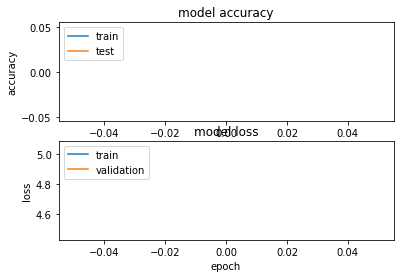

In [29]:
model_history=history
plt.figure(1)  
plt.subplot(211)  
plt.plot(model_history['acc'])  
plt.plot(model_history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(model_history['loss'])  
plt.plot(model_history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()  

